<a href="https://colab.research.google.com/github/alissaleigh/food-sales-predictions/blob/main/Final_Part_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing and Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import set_config
import seaborn as sns
import pandas as pd
import numpy as np
set_config(display='diagram')

In [3]:
filename = '/content/drive/MyDrive/panda/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

Removing Columns

In [4]:
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


Duplicates:


In [5]:
df.duplicated().sum()

0

Identifing Missing Values:

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
print(df.isna().sum().sum(), 'missing values')

3873 missing values


##Ordinal Encoding

In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1}, inplace=True)
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [14]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
df['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2':1, 'Tier 3':2}, inplace=True)
df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [16]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
df['Outlet_Type'].replace({'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3}, inplace=True)
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

##Train/Split Data

In [18]:
#Splitting and testing the data
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Column Transformer

In [19]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [20]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

In [21]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [22]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [23]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9fdb248ac0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9fdb24e6a0>)])

In [24]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [25]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.743119,-0.740321,-0.712775,1.828109,1.327849,0.345180,1.084948,0.983572,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.505876,1.350766,-1.291052,0.603369,1.327849,0.345180,1.084948,0.983572,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.119583,1.350766,1.813319,0.244541,0.136187,0.345180,-1.384777,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.063163,-0.740321,-1.004931,-0.952591,0.732018,-1.093333,-0.149914,-0.263600,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.390145,-0.740321,-0.965484,-0.336460,0.493686,NaN,-0.149914,-0.263600,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5285 non-null   float64
 1   1       6392 non-null   float64
 2   2       6392 non-null   float64
 3   3       6392 non-null   float64
 4   4       6392 non-null   float64
 5   5       4580 non-null   float64
 6   6       6392 non-null   float64
 7   7       6392 non-null   float64
 8   8       6392 non-null   float64
 9   9       6392 non-null   float64
 10  10      6392 non-null   float64
 11  11      6392 non-null   float64
 12  12      6392 non-null   float64
 13  13      6392 non-null   float64
 14  14      6392 non-null   float64
 15  15      6392 non-null   float64
 16  16      6392 non-null   float64
 17  17      6392 non-null   float64
 18  18      6392 non-null   float64
 19  19      6392 non-null   float64
 20  20      6392 non-null   float64
 21  21      6392 non-null   float64
 22  

##Simple Imputer

In [27]:
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
categorical columns are ['Item_Type']


In [28]:
df_num = df[num_columns]

df_num.loc[:, df_num.isna().any()]

,Item_Weight,Outlet_Size
0,9.300,1.0
1,5.920,1.0
2,17.500,1.0
3,19.200,NaN
4,8.930,2.0
...,...,...
8518,6.865,2.0
8519,8.380,NaN
8520,10.600,0.0
8521,7.210,1.0


In [29]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5285 non-null   float64
 1   1       6392 non-null   float64
 2   2       6392 non-null   float64
 3   3       6392 non-null   float64
 4   4       6392 non-null   float64
 5   5       4580 non-null   float64
 6   6       6392 non-null   float64
 7   7       6392 non-null   float64
 8   8       6392 non-null   float64
 9   9       6392 non-null   float64
 10  10      6392 non-null   float64
 11  11      6392 non-null   float64
 12  12      6392 non-null   float64
 13  13      6392 non-null   float64
 14  14      6392 non-null   float64
 15  15      6392 non-null   float64
 16  16      6392 non-null   float64
 17  17      6392 non-null   float64
 18  18      6392 non-null   float64
 19  19      6392 non-null   float64
 20  20      6392 non-null   float64
 21  21      6392 non-null   float64
 22  

In [30]:
median_imputer = SimpleImputer(strategy='median')

median_imputer.fit(X_train[num_columns])

X_train.loc[:, num_columns] = median_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = median_imputer.transform(X_test[num_columns])

In [31]:
X_train.isna().any()

Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

##OneHotEncoder

In [32]:
cat_selector(X_train)

['Item_Type']

In [33]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

,Item_Type
4776,Household
7510,Snack Foods
5828,Meat
5327,Baking Goods
4810,Frozen Foods
...,...
5734,Fruits and Vegetables
5191,Frozen Foods
5390,Health and Hygiene
860,Snack Foods


In [34]:
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe_encoder.fit(train_cat_data)

train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6388,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
num_selector = make_column_selector(dtype_include='number')

train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)

X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,16.350,0.0,0.029565,256.4646,2009.0,1.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.250,1.0,0.000000,179.7660,2009.0,1.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.350,1.0,0.158716,157.2946,1999.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7.975,0.0,0.014628,82.3250,2004.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.350,0.0,0.016645,120.9098,2002.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,9.395,1.0,0.286345,139.1838,1998.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6388,15.600,0.0,0.117575,75.6670,2007.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6389,17.600,0.0,0.018944,237.3590,2002.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6390,20.350,0.0,0.054363,117.9466,2007.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##Linear Regression

In [37]:
#Instantiating the scaler
scaler = StandardScaler()

In [38]:
#Instantiating the model
reg = LinearRegression()

In [39]:
#Creating a modeling pipeline
reg_pipe = make_pipeline(scaler, reg)

In [40]:
#I was getting a 'ValueError: could not convert string to float:' on the reg_pipe cell, 
#used stackflow overview to resolve https://stackoverflow.com/questions/46092914/sklearn-linearregression-could-not-convert-string-to-float
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [41]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = LinearRegression().fit(X_train, y_train)

In [43]:
#Training the model
reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [44]:
#Making predictions
predictions = reg_pipe.predict(X_test)

In [45]:
prediction_df = X_test.copy()
prediction_df['True Median Price'] = y_test
prediction_df['Predicted Median Price'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Median Price,Predicted Median Price,Error
7503,14.300,0,0.026300,0.0,79.4302,1987,2.0,2,1,1743.0644,1091.653417,-651.410983
2957,7.930,0,0.071136,0.0,42.7086,1997,0.0,0,1,356.8688,646.817860,289.949060
7031,14.500,1,0.041313,0.0,42.0454,1999,1.0,0,1,377.5086,964.932049,587.423449
1084,0.000,1,0.044767,0.0,173.7054,1985,1.0,2,3,5778.4782,4248.480781,-1529.997419
856,10.195,1,0.012456,0.0,197.5110,2004,0.0,1,1,2356.9320,2925.917711,568.985711


In [46]:
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(scaler,lin_reg)
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [47]:
#Creating model predictions based on Linear Regression
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

In [48]:
#Evaluating the model
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1210.4109644176876
Model Testing RMSE: 1161.7186705705394


In [49]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2 {test_r2}')

Model Training R2: 0.5049445408013175
Model Testing R2 0.5111483387999307


##Regression Tree

In [50]:
#Making an instance
dec_tree = DecisionTreeRegressor(random_state = 42)

In [51]:
#Fiting the model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
#Predicting the target values
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [53]:
#Evaluating the Model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

print(train_score)
print(test_score)

1.0
0.15259871780957424


In [54]:
#Tuning the Model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [55]:
dec_tree.get_depth()

34

In [56]:
dec_tree.get_n_leaves()

6289

In [57]:
#Finding the optimal Max Depth
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)

print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707166


In [58]:
dec_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)

print(train_15_score)
print(test_15_score)

0.823036628728609
0.3522252332111204


In [59]:
depths = list(range(2, 36))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_train, y_train)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

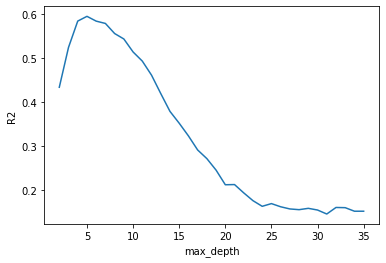

In [60]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [61]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.594648,0.603891
4,0.583877,0.582633
6,0.583775,0.61481
7,0.578527,0.62665
8,0.555637,0.644697


In [62]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)

print(train_6_score)
print(test_6_score)

0.6148096582355076
0.5837748656665115


In [63]:
#Creating model predictions based on Linear Regression
train_pred_tree = dec_tree_6.predict(X_train)
test_pred_tree = dec_tree_6.predict(X_test)

In [64]:
#Evaluating the model
train_RMSE = np.sqrt(np.mean(np.abs(train_pred_tree - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred_tree - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1067.6861684331504
Model Testing RMSE: 1071.6135927844368


In [65]:
train_r2 = np.corrcoef(y_train, train_pred_tree)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred_tree)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2 {test_r2}')

Model Training R2: 0.6148096582355087
Model Testing R2 0.5852910906233598


##Final Thoughts

So looking at the results after correcting some mistakes, the Tree Regressor goes appear to have the better results, as well as if I was going to show this data as is to a shareholder, I also think the visual the Tree creates is helpful as well.